Лекция 5 PySpark домашнее задание

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [3]:
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [8]:
#общая сттистика по выборке
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [9]:
#Средние значения по сортам ирисов
dfgrp = df.groupBy('variety')
dfgrp.avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [10]:
#Посмотрим СКО, чтобы найти границы для гипотезы
df.where((df['variety'] == 'Versicolor')).describe().show()

+-------+------------------+------------------+------------------+-------------------+----------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|   variety|
+-------+------------------+------------------+------------------+-------------------+----------+
|  count|                50|                50|                50|                 50|        50|
|   mean|             5.936|2.7700000000000005|              4.26| 1.3259999999999998|      null|
| stddev|0.5161711470638635|0.3137983233784114|0.4699109772399579|0.19775268000454407|      null|
|    min|               4.9|               2.0|               3.0|                1.0|Versicolor|
|    max|               7.0|               3.4|               5.1|                1.8|Versicolor|
+-------+------------------+------------------+------------------+-------------------+----------+



In [11]:
#Setosa
df_set = df.where(df['variety'] == 'Setosa')
df_set.describe().show()

+-------+------------------+------------------+------------------+-------------------+-------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|variety|
+-------+------------------+------------------+------------------+-------------------+-------+
|  count|                50|                50|                50|                 50|     50|
|   mean| 5.005999999999999| 3.428000000000001|1.4620000000000002| 0.2459999999999999|   null|
| stddev|0.3524896872134513|0.3790643690962886|0.1736639964801841|0.10538558938004565|   null|
|    min|               4.3|               2.3|               1.0|                0.1| Setosa|
|    max|               5.8|               4.4|               1.9|                0.6| Setosa|
+-------+------------------+------------------+------------------+-------------------+-------+



In [12]:
#Virginica
df_vir = df.where(df['variety'] == 'Virginica')
df_vir.describe().show()

+-------+-----------------+------------------+------------------+------------------+---------+
|summary|     sepal_length|       sepal_width|      petal_length|       petal_width|  variety|
+-------+-----------------+------------------+------------------+------------------+---------+
|  count|               50|                50|                50|                50|       50|
|   mean|6.587999999999998|2.9739999999999998|             5.552|             2.026|     null|
| stddev|0.635879593274432|0.3224966381726375|0.5518946956639833|0.2746500556366674|     null|
|    min|              4.9|               2.2|               4.5|               1.4|Virginica|
|    max|              7.9|               3.8|               6.9|               2.5|Virginica|
+-------+-----------------+------------------+------------------+------------------+---------+



In [13]:
#Virginica
df_ver = df.where(df['variety'] == 'Versicolor')
df_ver.describe().show()

+-------+------------------+------------------+------------------+-------------------+----------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|   variety|
+-------+------------------+------------------+------------------+-------------------+----------+
|  count|                50|                50|                50|                 50|        50|
|   mean|             5.936|2.7700000000000005|              4.26| 1.3259999999999998|      null|
| stddev|0.5161711470638635|0.3137983233784114|0.4699109772399579|0.19775268000454407|      null|
|    min|               4.9|               2.0|               3.0|                1.0|Versicolor|
|    max|               7.0|               3.4|               5.1|                1.8|Versicolor|
+-------+------------------+------------------+------------------+-------------------+----------+



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

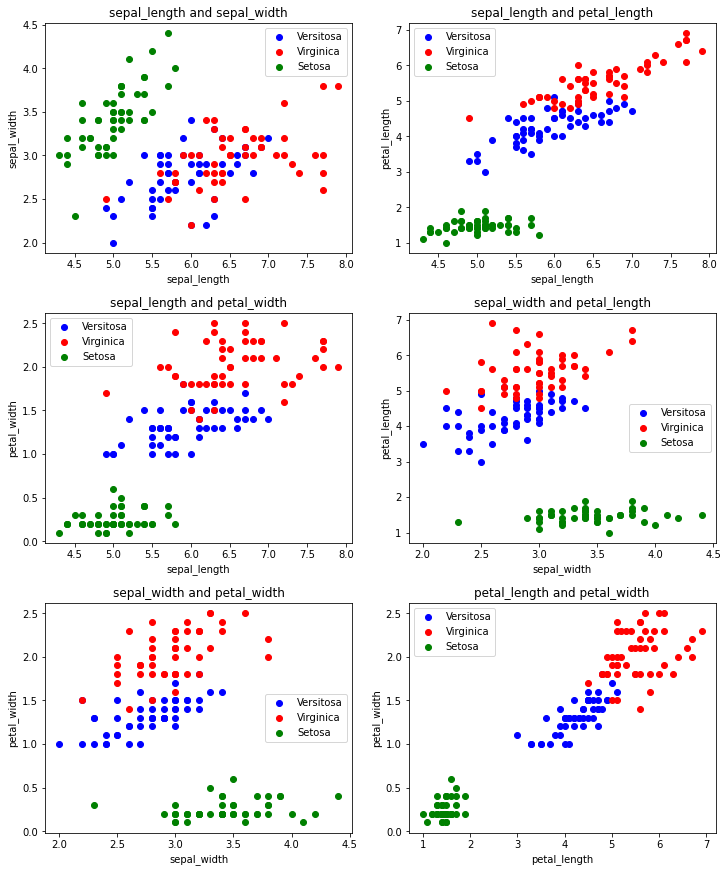

In [15]:
#Нарисуем графики зависимостей параметров Ирисов по сортам
x = [['sepal_length', 'sepal_width'], 
     ['sepal_length','petal_length'],
     ['sepal_length','petal_width'],
     ['sepal_width', 'petal_length'],
     ['sepal_width', 'petal_width'],
     ['petal_length', 'petal_width']
     ]

rows = 3
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(10,12), constrained_layout=True)

for i, ax in zip(x, axs.flat):
  sh_ver1 = df_ver.select(i[0]).collect()
  sh_ver2 = df_ver.select(i[1]).collect()
  ax.scatter(sh_ver1, sh_ver2, c='blue', label='Versitosa')
  sh_vir1 = df_vir.select(i[0]).collect()
  sh_vir2 = df_vir.select(i[1]).collect()
  ax.scatter(sh_vir1, sh_vir2, c='red', label='Virginica')
  sh_set1 = df_set.select(i[0]).collect()
  sh_set2 = df_set.select(i[1]).collect()
  ax.scatter(sh_set1, sh_set2, c='green', label='Setosa')

  ax.legend()
  ax.set_title(i[0]+' and '+i[1])
  ax.set_xlabel(i[0])
  ax.set_ylabel(i[1])

In [26]:
#Делаем предположение, что если petal_length выше 4,5, то с высокой доелй вероятности это Virginica
import pyspark.sql.functions as func
df_new = df.withColumn("predict", func.when((df['petal_length'] >= 4.5), 'Virginica').when((df['petal_length'] >= 1.9) & (df['petal_length'] <= 4.5), 'Versicolor').otherwise('Setosa'))
df_new.where(df_new['variety'] == 'Versicolor').show(10)

+------------+-----------+------------+-----------+----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|   predict|
+------------+-----------+------------+-----------+----------+----------+
|         7.0|        3.2|         4.7|        1.4|Versicolor| Virginica|
|         6.4|        3.2|         4.5|        1.5|Versicolor| Virginica|
|         6.9|        3.1|         4.9|        1.5|Versicolor| Virginica|
|         5.5|        2.3|         4.0|        1.3|Versicolor|Versicolor|
|         6.5|        2.8|         4.6|        1.5|Versicolor| Virginica|
|         5.7|        2.8|         4.5|        1.3|Versicolor| Virginica|
|         6.3|        3.3|         4.7|        1.6|Versicolor| Virginica|
|         4.9|        2.4|         3.3|        1.0|Versicolor|Versicolor|
|         6.6|        2.9|         4.6|        1.3|Versicolor| Virginica|
|         5.2|        2.7|         3.9|        1.4|Versicolor|Versicolor|
+------------+-----------+------------

In [42]:
df_res = df_new.withColumn("accuracy", func.when(df_new['variety'] == df_new['predict'], True).otherwise(False))
accuracy_cnt = df_res.groupBy('accuracy').count().show()
accuracy_cnt

+--------+-----+
|accuracy|count|
+--------+-----+
|    true|  127|
|   false|   23|
+--------+-----+



In [54]:
#Результат предсказания 
df_res.where(df_res['accuracy'] == True).count()/df_res.count()

84.66666666666667